# Smart Mobile Phone Price Prediction using Machine Learning
### Name : AJAY KUMAR M
### Team Name : X-01
### Regno	    : URK20CS2018
### Year	    : IV Year
### Dept	    : CSE
### Email	    : ajaykumar20@karunya.edu.in




##Introduction


In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning algorithms such as logistic regression, decision tree, random forest and k-nearest neighbors(knn).

In [ ]:
# The libraries & modules which we are going to use in our study:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Opening file here

In [ ]:
# First of all, we load our data as a csv file:
data = pd.read_csv("/content/data.csv")



##Explore the dataset
Let's explore our dataset.

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Columns

In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Shape of the dataset

In [ ]:
data.shape

(2000, 21)

Datatypes in the dataset

In [ ]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Data information about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Finding null cells in the dataset

In [ ]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

General Description of the dataset

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "x".

In [ ]:
y = data['price_range']
x = data.drop('price_range', axis = 1)

We have four price ranges as target values and will do multi-class classification in our study.

In [ ]:
y.unique()


array([1, 2, 3, 0])

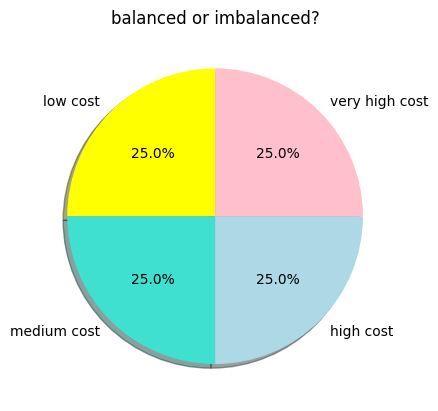

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()

In addition to 'data.csv' file, we have a 'test_data.csv' file, but latter one does not have target data so we do not have the chance of testing our model with it.
We split our dataset into 'training' and 'validation' datasets. And, we are going to see our models' accuracy by applying them on validation dataset.

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

In [ ]:
# check whether the split works correctly
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


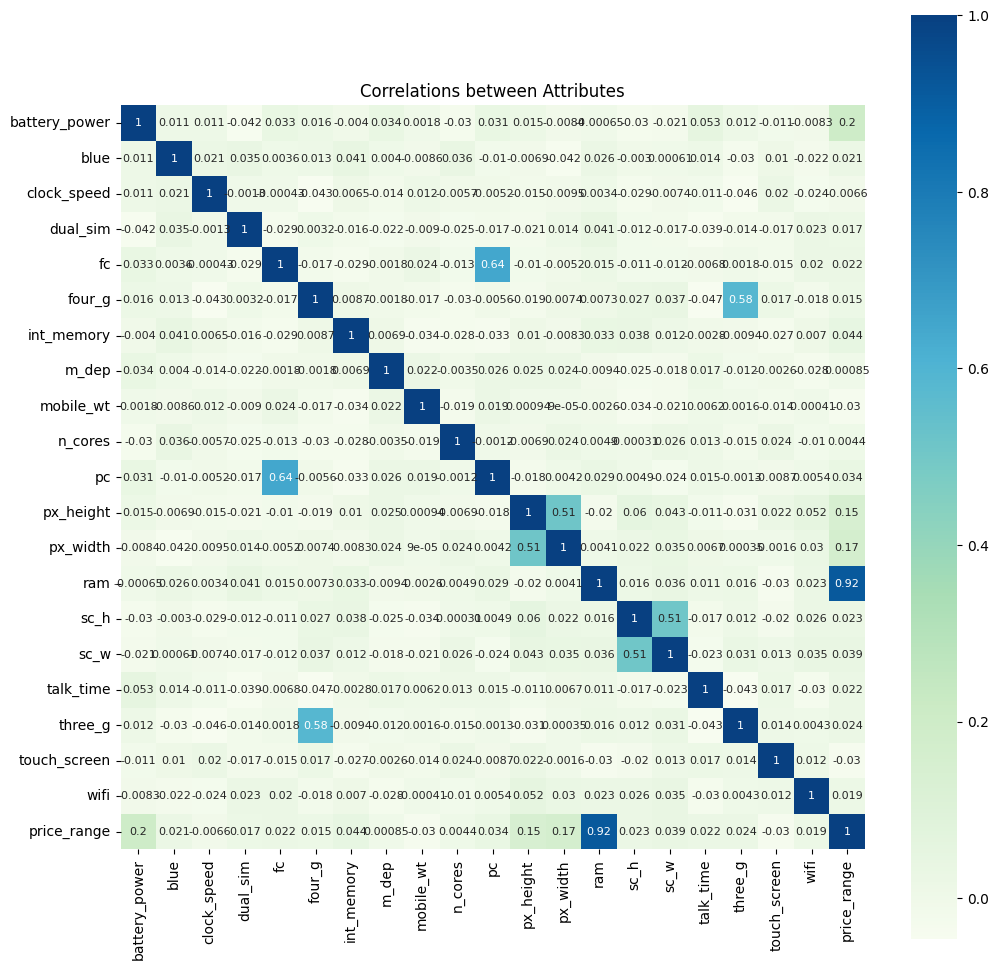

In [ ]:
# Before going through machine learning applications, let's see the correlation btw features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

We see from the heatmap;

the most influential variable is ram
most of the variables have very little correlation to price range
primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.
having 3G and 4G is somewhat correlated
there is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

###  Data visualization

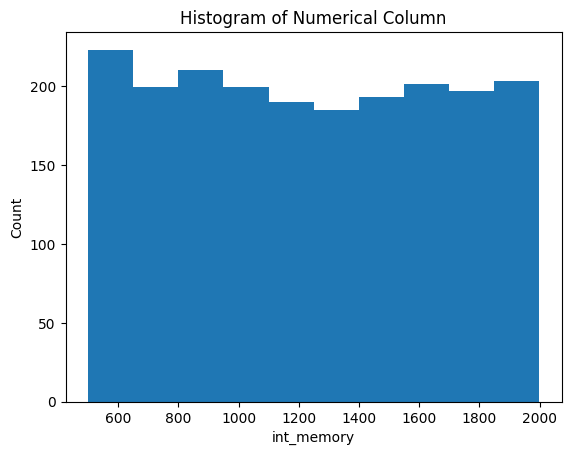

In [ ]:
#

# Histogram of a numerical variable
plt.hist(data['battery_power'])
plt.xlabel('int_memory')
plt.ylabel('Count')
plt.title('Histogram of Numerical Column')
plt.show()


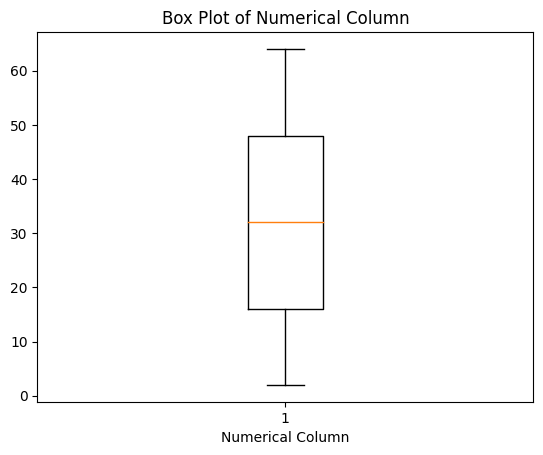

In [ ]:

# Box plot of a numerical variable
plt.boxplot(data['int_memory'])
plt.xlabel('Numerical Column')
plt.title('Box Plot of Numerical Column')
plt.show()


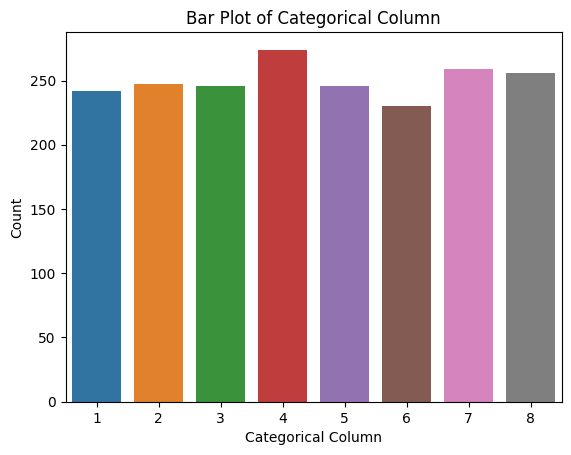

In [ ]:

# Bar plot of a categorical variable
sns.countplot(x='n_cores', data=data)
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.title('Bar Plot of Categorical Column')
plt.show()


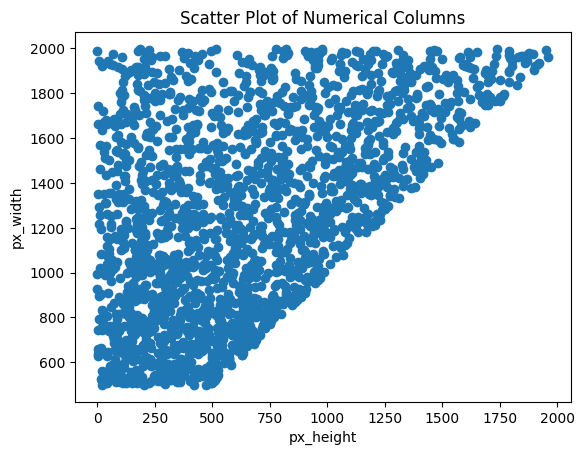

In [ ]:

# Scatter plot of two numerical variables
plt.scatter(data['px_height'], data['px_width'])
plt.xlabel('px_height')
plt.ylabel('px_width')
plt.title('Scatter Plot of Numerical Columns')
plt.show()


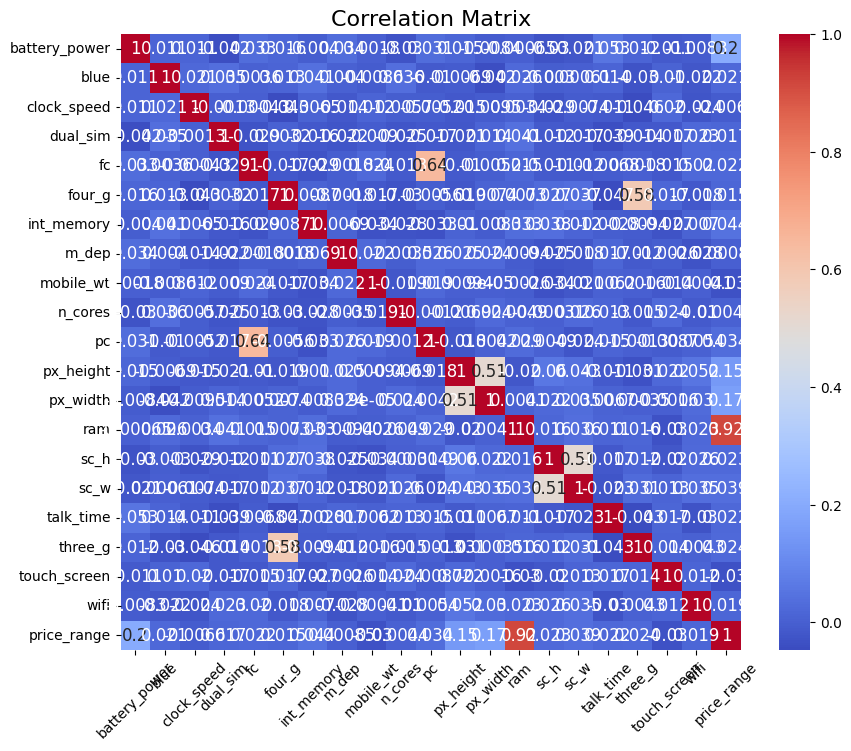

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 12})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



---



---



---



#Implementation of ML Algorithms
To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

*   Linear Regression
*   Multiple Regression
*   Logistic regression
*   Decision tree
*   Random forest
*   KNN

###>>> Linear Regression

Linear regression is a supervised learning algorithm used for predicting a continuous numerical output variable based on one or more input features. It assumes a linear relationship between the input features and the target variable. The goal is to find the best-fit line that minimizes the sum of squared differences between the predicted and actual values. Linear regression is widely used for tasks such as price prediction, demand forecasting, and trend analysis.

In [ ]:
x = data['price_range']
y = data['clock_speed']


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

Find the bo and b1 values to get Ypredicted

In [ ]:
numerator  = (len(xtrain) * (np.sum(xtrain * ytrain) ) ) - ( np.sum(xtrain) * np.sum(ytrain) )
denominator = (len(xtrain) * np.sum(np.square(xtrain)) - np.square(np.sum(xtrain)) )

In [ ]:
slope = numerator / denominator
slope

-0.004152703193765839

In [ ]:
intercept = ytrain.mean() - ( slope * xtrain.mean() )
intercept

1.5427710007267734

In [ ]:
# m = (n∑(xi*yi) - (∑xi)(∑yi)) / (n∑(xi^2) - (∑xi)^2)

# Linear Function
# f(x) = mx + c

def linear_regression(xtest):
    ypred = (slope * xtest) + intercept
    return ypred

In [ ]:
ypred = linear_regression(xtest)

After getting Ypred, calculate the SSE (sum of squared error)

In [ ]:
# Sum of Squared Erros
# SSE = ∑(y_i - (b0 + b1*x_i))^2

errors = ytest - ypred
SSE = (errors ** 2).sum()

print(SSE)

266.37182009172955


Calculate the RMSE (Root Mean Square Error) value

In [ ]:
# RMSE = √(1/n) * ∑(y_i - (b0 + b1*x_i))^2

errors = ytest - ypred
RMSE = np.sqrt((errors**2).mean() )

print(RMSE)

0.8160450662980102


Calculate the coefficient of determination (r2) r-square

In [ ]:
# r2 = 1 - (SSE / SST)
# SSE - Sum of squared errors
# SST - Total sum of squares.

errors = ytest - ypred
SSE = (errors ** 2).sum()

SST = ( (ytest - ytest.mean() ) ** 2).sum()
r2 = 1 - (SSE / SST)

print(r2)

-0.007713169693374544


Predict the output for a given input value

In [ ]:
user_input = float(input('Enter a value for year of experience to predict parameter - '))

print(linear_regression(user_input))

Enter a value for year of experience to predict parameter - 1.5
1.5365419459361247




---



### >>>Multiple Linear Regression

Multiple regression extends linear regression to cases where there are multiple input features. It aims to model the relationship between the multiple independent variables and the target variable. It estimates the coefficients for each input feature, representing the influence of each feature on the target variable while accounting for the presence of other features.

In [ ]:
# 3. Choose independent variables (X1,X2 ....) and dependent variable (Y) from given dataset
X1 = data['price_range'] #independent variable
X2 = data['ram'] #independent variable
Y = data['clock_speed'] #dependent variable

In [ ]:
# 4. Print values of y-intercept and independent variable coefficients
import numpy as np
x1_mean = np.mean(X1)
x2_mean = np.mean(X2)
y_mean = np.mean(Y)
n = X1.count()
Ex1_2 = sum(X1**2) - (sum(X1)**2/n)
Ex2_2 = sum(X2**2) - (sum(X2)**2/n)
Ex1y = sum(X1*Y) - (sum(X1)*sum(Y)/n)
Ex2y = sum(X2*Y) - (sum(X2)*sum(Y)/n)
Ex1x2 = sum(X1*X2) - (sum(X1)*sum(X2)/n)


b1 = ((Ex2_2 * Ex1y) - (Ex1x2 * Ex2y))/((Ex1_2 * Ex2_2) - (Ex1x2**2))
b2 = ((Ex1_2 * Ex2y) - (Ex1x2 * Ex1y))/((Ex1_2 * Ex2_2) - (Ex1x2**2))
b0 = y_mean - (b1*x1_mean) - (b2*x2_mean)

print(b0)
print(b1)
print(b2)

1.4939776707848953
-0.04479666419240958
4.4942444803661085e-05


Find the Ypred

In [ ]:
# 5. Find the Ypred
y_pred = b0 + (b1 * X1) + (b2 * X2)
y_pred

0       1.563739
1       1.522628
2       1.521370
3       1.528830
4       1.512595
          ...   
1995    1.523999
1996    1.495707
1997    1.496977
1998    1.533033
1999    1.535717
Length: 2000, dtype: float64

 Calculate the SSE (sum of squared error)and RMSE (Root Mean Square Error) value

In [ ]:
# 6. Calculate the SSE (sum of squared error)and RMSE (Root Mean Square Error) value
SSE = sum((Y - y_pred)**2)
print('Sum of squared error:', SSE)

Sum of squared error: 1330.2462803622286


In [ ]:
RMSE = np.sqrt(sum((Y - y_pred)**2)/len(X1))
RMSE

0.8155508201093996

(r2) r-square

In [ ]:
# 7. Calculate the coefficient of determination (r2) r-square
SSR = sum((Y - y_pred)**2)
SST = sum((Y - y_mean)**2)
r_square = 1 - (SSR/SST)
r_square

0.0006112381967655622

Predict the output for a given input values

In [ ]:
# 9. Predict the output for a given input values
input1 = [float(i) for i in input("Enter the input values 1 to predict output : ").split()]
input2 = [float(i) for i in input("Enter the input values 2 to predict output : ").split()]
print("Input1\tInput2\tOutput")
for i in range(len(input1)):
        output = b0 + (b1 * input1[i]) + (b2 * input2[i])
        print(input1[i],"\t",input2[i],"\t",output)

Enter the input values 1 to predict output : 1.7
Enter the input values 2 to predict output : 3.6
Input1	Input2	Output
1.7 	 3.6 	 1.4179851344590921




---



### >>>Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

Logistic regression is a classification algorithm used when the target variable is binary or categorical. It predicts the probability of an input belonging to a specific class using a logistic function. Logistic regression is commonly used in tasks such as predicting customer churn, fraud detection, or disease diagnosis.

In [ ]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [ ]:
y_pred_lr = lr.predict(x_valid)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_lr)
confusion_matrix

array([[88, 11,  1,  0],
       [ 8, 64, 25,  3],
       [ 0, 13, 58, 29],
       [ 0,  1, 17, 82]])

In [ ]:
acc_lr = metrics.accuracy_score(y_valid, y_pred_lr)
acc_lr

0.73



---



### >>>Decision Tree
Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.

Decision tree algorithms create a tree-like model where each internal node represents a feature, each branch represents a decision or rule, and each leaf node represents an outcome or prediction. Decision trees are versatile and can handle both classification and regression tasks. They are interpretable and can capture non-linear relationships and interactions between features.

In [ ]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(x_train, y_train)

In [ ]:
y_pred_dt = dt.predict(x_valid)

In [ ]:
dt_model

DecisionTreeClassifier(random_state=101)

After building a decision tree model, now, we are going to measure the performance of the model by means of confusion matrix:

In [ ]:
print(metrics.confusion_matrix(y_valid, y_pred_dt))

[[89 11  0  0]
 [ 7 74 19  0]
 [ 1  9 80 10]
 [ 0  0 12 88]]


In [ ]:
# Even though precision and recall are good measures for imbalanced data, we can touch on these concepts here:
print(metrics.classification_report(y_valid, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.79      0.74      0.76       100
           2       0.72      0.80      0.76       100
           3       0.90      0.88      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



How do we interpret the numbers in classification report?
Precision and recall metrices should be high as possible. They gives us accuracy level out of different classes.
We use f1-score to compare models that have different precision and recall levels.

In [ ]:
acc_dt = metrics.accuracy_score(y_valid, y_pred_dt)
acc_dt

0.8275



---



### >>>Random Forest
Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

Random forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It works by constructing a multitude of decision trees on different subsets of the training data and aggregating their predictions. Random forest is known for its robustness, ability to handle high-dimensional data, and resistance to overfitting.

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True)
model_rf = rf.fit(x_train, y_train)

In [ ]:
y_pred_rf = rf.predict(x_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, y_pred_rf))

[[91  9  0  0]
 [ 3 91  6  0]
 [ 0  7 85  8]
 [ 0  0  6 94]]


In [ ]:
# Create confusion matrix
pd.crosstab(y_valid, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,91,9,0,0
1,3,91,6,0
2,0,7,85,8
3,0,0,6,94


In [ ]:
acc_rf = metrics.accuracy_score(y_valid, y_pred_rf)
acc_rf

0.9025

We see that accuracy score in random forest model is higher than decision tree accuracy score.

### >>>K-Nearest Neighbors (KNN)
'K' is the number of nearest training points which we classify them using the majority vote.

K-Nearest Neighbors is a simple yet effective algorithm used for regression tasks. Given a new data point, KNN determines its class or predicts its value based on the majority vote or average of the K nearest neighboring data points in the feature space. KNN is a non-parametric algorithm and does not make assumptions about the underlying data distribution.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = model_knn.predict(x_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[94  6  0  0]
 [ 3 96  1  0]
 [ 0  3 92  5]
 [ 0  0  7 93]]


In [ ]:
print(accuracy_score(y_valid, y_pred_knn))

0.9375


In the first try, we did not know the optimum 'k'.
Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 9}

After finding optimum k number, we run our model again with k=9.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred_knn = model_knn.predict(x_valid)
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[95  5  0  0]
 [ 2 96  2  0]
 [ 0  3 94  3]
 [ 0  0  6 94]]


In [ ]:
acc_knn = accuracy_score(y_valid, y_pred_knn)
acc_knn

0.9475



---



---



---



#Conclusion

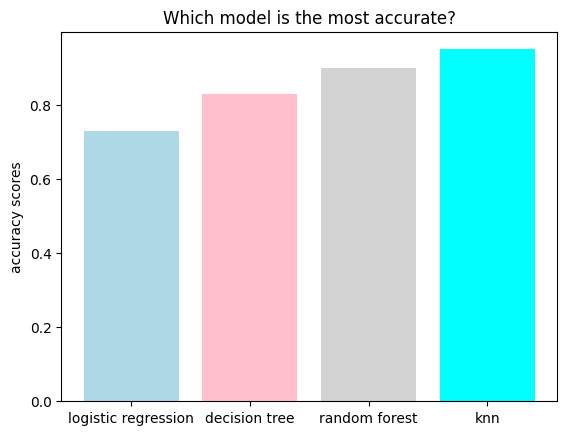

In [ ]:
#
models = ['logistic regression', 'decision tree', 'random forest', 'knn']
acc_scores = [0.73, 0.83, 0.90, 0.95]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

After training our dataset with four different model, we conclude that KNN is best model for our dataset. (via the highest accuracy score = 0.95)
Finally, we can run our KNN model to predict target values on the test dataset and add labels to dataset.

In [ ]:
test_data = pd.read_csv("/content/test_data.csv")

In [ ]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.
test_data=test_data.drop('id',axis=1)

In [ ]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
predicted_price_range = model_knn.predict(test_data)
# We are able to forecast test dataset labels:
predicted_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
test_data['price_range'] = predicted_price_range
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


We have achieved our goal and predicted price ranges for mobile phones in our new dataset.